In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

# dataset
iris = load_iris()
x = iris.data    # (150,4)
y = iris.target  # (150,)
N,D = x.shape  

x = np.hstack([np.ones((N,1)), x])  # design matrix 150 x 5
N,D = x.shape



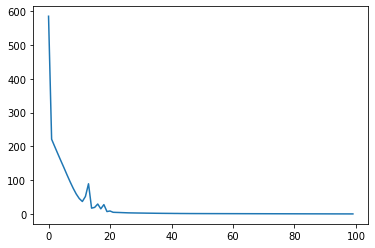

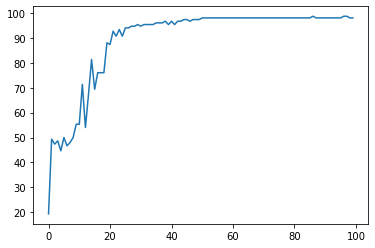

In [ ]:
# perceptron, batch gradient descent
t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = -1

# hyperparameter
eta = 0.001         
maxEpoch = 100   

# initialization
w = np.array([-10.0, 1.0, 1.0, 1.0, 1.0]) 
cost = []
accuracy = []

for epoch in range(maxEpoch):

    y_pred = x.dot(w)              
    t_pred = np.sign(y_pred)      
    
    # misclassified patterns
    id_misclass = np.where(t_pred*t < 0)[0] 
    
    # cost
    cost.append(-np.sum(y_pred[id_misclass]*t[id_misclass]))
    
    # accuracy
    accuracy.append(accuracy_score(t,t_pred)*100)
    
    # gradient descent
    if id_misclass.size == 0:
        break
    for n in id_misclass :
      grad = t[n] * x[n,:]     
      w = w + eta * grad   

plt.figure()
plt.plot(cost)
plt.figure()
plt.plot(accuracy)

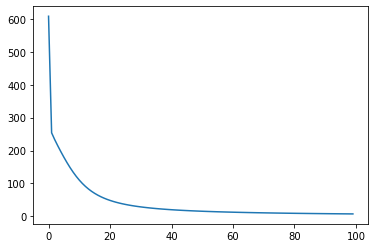

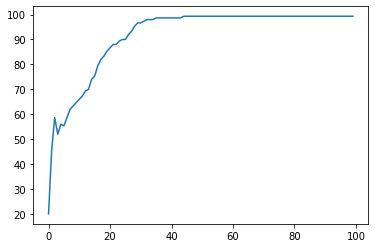

In [ ]:
# logistic regression, batch gradient descent

t = np.zeros(y.shape)
t[y == 0] = +1
t[y != 0] = 0

def sigmoid(x):                         
    return 1 / (1 +np.exp(-x))

# hyperparameter
eta = 0.001
maxEpoch = 100

# initialize
w = np.array([-10.0, 1.0, 1.0, 1.0, 1.0]) 
cost = []
accuracy = []
b = np.zeros(N)  # accuracy 계산을 위한 리스트

for epoch in range(maxEpoch):    

    # prediction
    a_pred = x.dot(w)
    y_pred = sigmoid(a_pred)
    
    grad = (y_pred - t).reshape(1,-1).dot(x).reshape(-1)
    w = w - eta*grad
    
    #cost
    cost.append( -np.sum( t*np.log(y_pred) + (1 - t)*np.log(1 - y_pred) ) )
    
    # accuracy
    # accuracy_score 함수를 사용하기 위해 y_pred 를 binary로 바꾼 리스트 생성
    for i in range(N):
        if y_pred[i]>=0.5:
            b[i] = +1
        else:
            b[i] = 0
    accuracy.append(accuracy_score(t,b)*100)

plt.figure()
plt.plot(cost)
plt.figure()
plt.plot(accuracy)